# House price prediction with TuriCreate


Turi Create is an open-source python library developed by Apple, used to create core machine learning models for supervised and unsupervised learning.


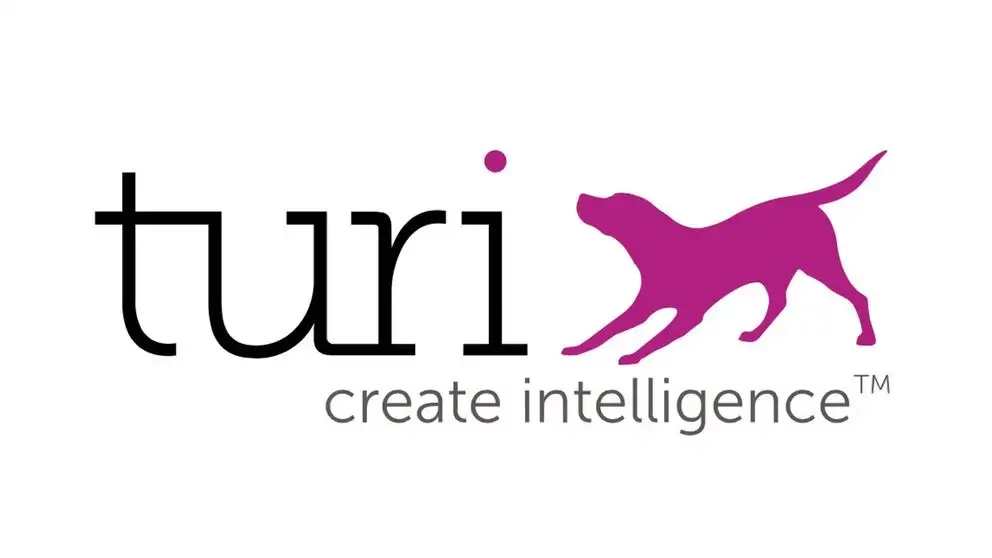

### Features

* Easy-to-use: Focus on tasks instead of algorithms
* Visual: Built-in, streaming visualizations to explore your data
* Flexible: Supports text, images, audio, video and sensor data
* Fast and Scalable: Work with large datasets on a single machine
* Ready To Deploy: Export models to Core ML for use in iOS, macOS, watchOS, and tvOS apps


#### Data Description:

* The dataset consists of 2518 rows (one per house) and 39 columns (features).

* The target is the "Price".

### **Load Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.3 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=b6b32534203d9560420691ae4e50ef52986f989f59b0f1f7095284e2f3593221
  Stored in directory: /root/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=c405e11852db4d5c2894932592544c3fc5edb94c759c3730625e26ab29b4d11b

In [4]:
import turicreate as tc
import matplotlib.pyplot as plt
import numpy as np

### **Load Data**

In [5]:
data = tc.SFrame('/content/drive/MyDrive/Hyderabad.csv')
data

Finished parsing file /content/drive/MyDrive/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.04257 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/MyDrive/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.02214 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


In [6]:
data.shape

(2518, 40)

In [7]:
data.column_names()


['Price',
 'Area',
 'Location',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [8]:
data.column_types()


[int,
 int,
 str,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int]

In [9]:
data[['Price','Area','Location']].plot()


Materializing SFrame

In [10]:
#Exploring the relationship between price and area
tc.visualization.scatter(data["Area"], 
                         data["Price"],
                        xlabel = "Area", 
                        ylabel = "House Price")

In [11]:
#Exploring the relationship between price and No. of Bedrooms
tc.visualization.scatter(data["No. of Bedrooms"], 
                         data["Price"],
                        xlabel = "No. of Bedrooms", 
                        ylabel = "House Price")

#Build a model with a single feature : Area

In [12]:
lr_model = tc.linear_regression.create(data, features=['Area'], target='Price')


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.001027     | 144148977.609610   | 49159312.163105      | 4802573.949044                  | 6569997.949452                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [13]:
# Get model summary
lr_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 2392
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0022

Settings
--------
Residual sum of squares        : 5.517080195419866e+16
Training RMSE                  : 4802573.949

Highest Positive Coefficients
-----------------------------
Area                           : 9966.6591

Lowest Negative Coefficients
----------------------------
(intercept)                    : -6557290.1096



In [14]:
lr_model.coefficients

name,index,value,stderr
(intercept),None,-6557290.10960428,240558.40866359798
Area,None,9966.659090906955,133.85299068157508


In [15]:
b, m = lr_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9966.659090906955
y-intercept: -6557290.10960428


In [16]:
def draw_line(slope,y_intercept, starting, ending, color='grey', linewidth=0.7):
  x = np.linspace(starting,ending)
  plt.plot(x,y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)


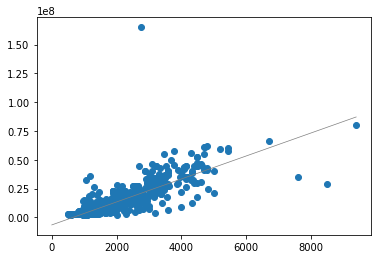

In [17]:
plt.scatter(data['Area'], data['Price'])
draw_line(m, b, starting=0, ending=max(data['Area']))

In [18]:
lr_model.evaluate(data)


{'max_error': 144148977.60961014, 'rmse': 4906171.890672198}

In [19]:
house = tc.SFrame({'Area': [9000], 'No. of Bedrooms':[3]})

lr_model.predict(house)

dtype: float
Rows: 1
[83142641.7085583]

#Build a model that uses three features : Area,Location,No. of Bedrooms


In [20]:
features = [
 'Area',
 'Location',
 'No. of Bedrooms']

In [21]:
lr_model = tc.linear_regression.create(data, features=features, target='Price')


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 241

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.018833     | 142323571.472165   | 29394860.344562      | 4283702.645862                  | 4573238.467938                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [22]:
lr_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 241
Number of examples             : 2392
Number of feature columns      : 3
Number of unpacked features    : 3

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.021

Settings
--------
Residual sum of squares        : 4.38934591927293e+16
Training RMSE                  : 4283702.6459

Highest Positive Coefficients
-----------------------------
Location[Abids]                : 19562467.0039
Location[Boiguda]              : 18712116.9556
Location[Saket]                : 12557538.9369
Location[Janachaitanya Colony] : 11532542.4592
Location[Banjara Hills]        : 10848378.3423

Lowest Negative Coefficients
----------------------

#Build a model that uses all the features


In [29]:
features = [
 'Area',
 'Location',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [30]:
train_data,test_data = data.random_split(0.7)


In [31]:
lr_model = tc.linear_regression.create(train_data,target='Price',features=features)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 1661

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 246

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.037079     | 138540201.962311   | 10127254.736562      | 4570464.342535                  | 2553514.477162                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [32]:
lr_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 246
Number of examples             : 1661
Number of feature columns      : 39
Number of unpacked features    : 39

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0407

Settings
--------
Residual sum of squares        : 3.4696868692905076e+16
Training RMSE                  : 4570464.3425

Highest Positive Coefficients
-----------------------------
Location[Abids]                : 21440377.6172
Location[Boiguda]              : 20274667.2475
Location[Janachaitanya Colony] : 14581282.029
Location[Film Nagar]           : 13510271.3401
Location[Saket]                : 13343239.6092

Lowest Negative Coefficients
------------------

In [33]:
### Model Evaluation
metrics = lr_model.evaluate(test_data)

In [34]:
metrics

{'max_error': 31752413.279078025, 'rmse': 3904417.9322964377}